In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="./data"
IMG_SIZE=100

Num GPUs Available:  True


In [3]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')

#label: 0 for dog ,1 for wolf # woof -woof
data=[]
y=[]
x=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    #Creating and saving each image in the form of numerical data in an array
    data.append((norm_image.flatten(),0))
    x.append(norm_image.flatten())
    #x.append(image)
    y.append(0)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    data.append((norm_image.flatten(),1))

    x.append(norm_image.flatten())
    #x.append(image)
    y.append(1)

In [4]:
df={'data':x,'label':y}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)
new_x=np.array(df.data)#df.data.to_numpy()
new_y=np.array(df.label)#df.label.to_numpy()

In [5]:
#plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [6]:
k={'data':x,'label':y}
ne_x=np.array(k['data'])
type(list(train_df.data))
#type(x)


list

In [7]:
x_data=tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
y_data=tf.placeholder(tf.float32,[None,1])
W=tf.Variable(tf.zeros([IMG_SIZE*IMG_SIZE,1]))
b=tf.Variable(tf.zeros([1]))
eps = 1e-12

In [40]:
h = tf.nn.sigmoid(tf.matmul(x_data,W)+b)#1 / (1.0 + tf.exp(-(tf.matmul(x,W) + b)))
correct_prediction = tf.equal(tf.argmax(h,1), tf.argmax(y_data,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# loss1 = -(y_data * tf.log(h + eps) + (1 - y_data) * tf.log( 1 - h + eps))
loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=y_data,logits=h)
loss = tf.reduce_mean(loss1)
alpha = 0.0053
update = tf.train.GradientDescentOptimizer(alpha).minimize(loss)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
x_f=list(train_df.data)
y_f=np.array(train_df.label).reshape(1400,1)
loss_data = []


In [41]:
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(x_data, W), b))
  
# Sigmoid Cross Entropy Cost Function
cost =tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = y_data))
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)

init = tf.global_variables_initializer()


In [44]:
with tf.Session() as sess:
      
    # Initializing the Variables
    sess.run(init)
      
    # Lists for storing the changing Cost and Accuracy in every Epoch
    cost_history, accuracy_history = [], []
      
    # Iterating through all the epochs
    for epoch in range(10000):
        cost_per_epoch = 0
          
        # Running the Optimizer
        sess.run(optimizer, feed_dict = {x_data : x_f, y_data : y_f})
          
        # Calculating cost on current Epoch
        c = sess.run(cost, feed_dict = {x_data : x_f, y_data : y_f})
          
        # Calculating accuracy on current Epoch
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                          tf.argmax(y_data , 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,
                                                 tf.float32))
          
        # Storing Cost and Accuracy to the history
        cost_history.append(c)
        accuracy_history.append(accuracy.eval({x_data : x_f, y_data : y_f}) * 100)
          
        # Displaying result on current Epoch
        if epoch % 100 == 0 and epoch != 0:
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1]))
      
    Weight = sess.run(W) # Optimized Weight
    Bias = sess.run(b)   # Optimized Bias
      
    # Final Accuracy
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
                                      tf.argmax(y_data, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                             tf.float32))
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 10 Cost: 0.6940941
Epoch 20 Cost: 0.6918836
Epoch 30 Cost: 0.6910571
Epoch 40 Cost: 0.6905887
Epoch 50 Cost: 0.69025403
Epoch 60 Cost: 0.6899777
Epoch 70 Cost: 0.68972784
Epoch 80 Cost: 0.6894886
Epoch 90 Cost: 0.6892518
Epoch 100 Cost: 0.6890127


In [23]:

for i in range(0,10000):
    if i%1000==0:
        print(loss.eval(session= sess, feed_dict = {x_data:x_f,y_data:y_f}))
        loss_data.append(loss.eval(session= sess, feed_dict = {x_data:x_f,y_data:y_f}))
    sess.run([update],feed_dict={x_data:x_f,y_data:y_f})

0.69314724
0.68372136
0.56646436
0.4719133
0.39311004
0.35993174
0.33468452
0.3128398
0.2937055
0.2767791


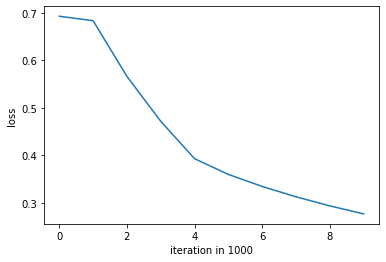

In [24]:
plt.ylabel('loss')
plt.xlabel('iteration in 1000')
plt.plot(loss_data)


In [29]:
x_val=list(val_df.data)
y_val=np.array(val_df.label).reshape(200,1)
print(sess.run(accuracy, feed_dict={x_data: x_val, y_data: y_val}))

1.0


In [146]:
k={'data':x,'label':y}
type(np.array(k['data']))

numpy.ndarray

In [147]:
np.array(k['data'])

array([[0.33333333, 0.3254902 , 0.33333333, ..., 0.13333333, 0.12941176,
        0.13333333],
       [0.33333333, 0.33333333, 0.35294118, ..., 0.88627451, 0.89019608,
        0.89803922],
       [0.28235294, 0.29803922, 0.30196078, ..., 0.30196078, 0.35294118,
        0.54901961],
       ...,
       [0.10980392, 0.13333333, 0.11764706, ..., 0.04705882, 0.01176471,
        0.00784314],
       [0.10196078, 0.06666667, 0.06666667, ..., 0.23921569, 0.18431373,
        0.22745098],
       [0.56862745, 0.5254902 , 0.5254902 , ..., 0.58823529, 0.52941176,
        0.58823529]])

In [148]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((train_df.data, train_df.label))

TypeError: Expected binary or unicode string, got array([0.19607843, 0.39215686, 0.63921569, ..., 0.75294118, 0.74117647,
       0.74901961])